# Using Clustering to spot correlation between number of times an option was chosen and total profit/loss made from that option

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
choice_95 = pd.DataFrame(pd.read_csv('data/choice_95.csv'))
win_95 = pd.DataFrame(pd.read_csv('data/wi_95.csv'))
loss_95 = pd.DataFrame(pd.read_csv('data/lo_95.csv'))

Creating a table with 15 rows (for 15 of the subjects) and 4 columns (for 4 of the choice options).

The 4 columns will represent the total profit/loss that the subject has made with each choice.

The aim is to have a 2D representation where the x-axis is the total profit/loss and the y axis being how many times they chose it.

In [37]:
profit_loss = []
count = []
for subject in range(0,15):
    ones_pl = 0
    twos_pl = 0
    threes_pl = 0
    fours_pl = 0
    ones_chosen = 0
    twos_chosen = 0
    threes_chosen = 0
    fours_chosen = 0
    for round in range(0,95):
        choice = choice_95.iloc[subject][round]
        win = win_95.iloc[subject][round]
        loss = loss_95.iloc[subject][round]
        if choice == 1:
            ones_chosen += 1
            ones_pl += (win + loss)
        elif choice == 2:
            twos_chosen += 1
            twos_pl += (win + loss)
        elif choice == 3:
            threes_chosen += 1
            threes_pl += (win + loss)
        elif choice == 4:
            fours_chosen += 1
            fours_pl += (win + loss)
    profit_loss.append([ones_pl, twos_pl, threes_pl, fours_pl])
    count.append([ones_chosen, twos_chosen, threes_chosen, fours_chosen])

In [38]:
my_list = []
for subject in range(0,15):
    for choice in range(0,4):
        my_list.append([profit_loss[subject][choice],count[subject][choice]])
my_array = np.array(my_list)

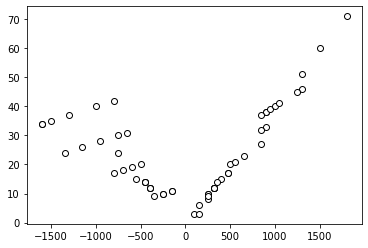

In [39]:
# plot the data points
plt.scatter(
   my_array[:, 0], my_array[:, 1],
   c='white',
   edgecolor='black'
)

In [30]:
kmeans = KMeans(
    n_clusters=5, init='random',
    n_init=1, 
    tol=1e-04, random_state=2
)

In [31]:
y_km = kmeans.fit_predict(my_array)

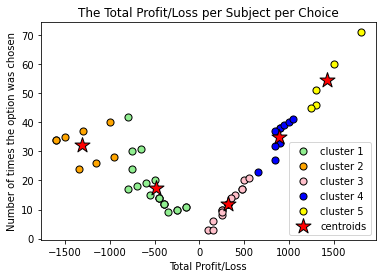

In [40]:
# plot the 5 clusters
plt.scatter(
    my_array[y_km == 0, 0], my_array[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    my_array[y_km == 1, 0], my_array[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    my_array[y_km == 2, 0], my_array[y_km == 2, 1],
    s=50, c='pink',
    marker='o', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    my_array[y_km == 3, 0], my_array[y_km == 3, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    my_array[y_km == 4, 0], my_array[y_km == 4, 1],
    s=50, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)

## Comparing to the option

In [48]:
option = [1,2,3,4]*15
option_array = np.array(option)
option_array
#print(len(my_array))
#print(len(option[0]))

array([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
       3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
       1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4])

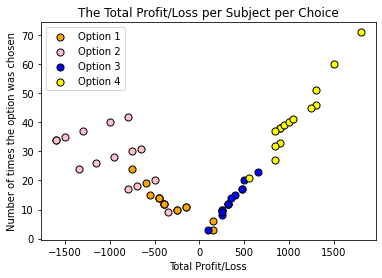

In [50]:
# plot the 4 clusters

plt.scatter(
    my_array[option_array == 1, 0], my_array[option_array == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Option 1'
)

plt.scatter(
    my_array[option_array == 2, 0], my_array[option_array == 2, 1],
    s=50, c='pink',
    marker='o', edgecolor='black',
    label='Option 2'
)

plt.scatter(
    my_array[option_array == 3, 0], my_array[option_array == 3, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='Option 3'
)

plt.scatter(
    my_array[option_array == 4, 0], my_array[option_array == 4, 1],
    s=50, c='yellow',
    marker='o', edgecolor='black',
    label='Option 4'
)

plt.title("The Total Profit/Loss per Subject per Choice")
plt.xlabel("Total Profit/Loss")
plt.ylabel("Number of times the option was chosen")
plt.legend(scatterpoints=1)